In [337]:
from igraph import *
import numpy as np

In [338]:
class Aluno(object):
    def __init__(self, codigo, area):
        self.codigo_aluno = codigo
        self.area_pesquisa = area
    
    def __repr__(self):
        to_string = "\nCódigo Aluno: " + str(self.codigo_aluno)
        to_string += ", Área de Pesquisa: " + str(self.area_pesquisa)
        return to_string 
        

In [339]:
file = open('Aluno_Area_Pesquisa.txt', 'r').read()
lines = file.split('\n')
alunos = []
for line in lines:
    line = line.split(' ')
    codigo_aluno = int(line[0])
    area_pesquisa = int(line[1])
    a = Aluno(codigo_aluno, area_pesquisa)
    alunos.append(a)
alunos

[
 Código Aluno: 1, Área de Pesquisa: 1,
 
 Código Aluno: 2, Área de Pesquisa: 1,
 
 Código Aluno: 3, Área de Pesquisa: 3,
 
 Código Aluno: 4, Área de Pesquisa: 2,
 
 Código Aluno: 5, Área de Pesquisa: 2,
 
 Código Aluno: 6, Área de Pesquisa: 3,
 
 Código Aluno: 7, Área de Pesquisa: 1,
 
 Código Aluno: 8, Área de Pesquisa: 1,
 
 Código Aluno: 9, Área de Pesquisa: 3,
 
 Código Aluno: 10, Área de Pesquisa: 2,
 
 Código Aluno: 11, Área de Pesquisa: 2]

In [340]:
def completa_matriz(matriz_triangulo):
    matriz_triangulo.sort(key=len, reverse=True)
    lado = len(matriz_triangulo)
    matriz = np.zeros((lado, lado))
    for i in range(lado):
        for j in range(len(matriz_triangulo[i])):
            matriz[i][i+j] = matriz_triangulo[i][j]
            matriz[i+j][i] = matriz_triangulo[i][j]
    return matriz
    

In [341]:
file = open('Matriz_Dissimilaridade.txt', 'r').read()
lines = file.split('\n')
matriz_triangulo = []
for l in lines:
    l = l.split(' ')
    l = list(filter(None, l))
    matriz_triangulo.append(l)
matriz = completa_matriz(matriz_triangulo)
matriz

array([[ 0., 80., 10.],
       [80.,  0., 50.],
       [10., 50.,  0.]])

In [342]:
def dist_aluno(aluno1, aluno2):
    area1 = aluno1.area_pesquisa
    area2 = aluno2.area_pesquisa
    return matriz[area1-1][area2-1]
    

In [343]:
dist_aluno(alunos[0],alunos[2])

10.0

In [344]:
class Aresta(object):
    def __init__(self, aluno1, aluno2, peso):
        self.aluno1 = aluno1
        self.aluno2 = aluno2
        self.peso = peso
        
        
    def __repr__(self):
        to_string = '\n('+str(self.aluno1.codigo_aluno)+', '
        to_string += str(self.aluno2.codigo_aluno)+', '
        to_string += str(self.peso)+')'
        return to_string 

In [345]:
class Grafo(object):
    
    vertices = []
    arestas = []
    
    def __init__(self, vertices, arestas):
        self.vertices = vertices
        self.arestas = arestas

        
    def add(self, aluno):
        mais_prox = self.vertices[0]
        dist_min = dist_aluno(aluno, mais_prox)
        for v in self.vertices:
            dist = dist_aluno(aluno, v)
            if dist < dist_min:
                dist_min = dist
                mais_prox = v
        self.vertices.append(aluno)
        aresta = Aresta(aluno, mais_prox, dist_min)
        self.arestas.append(aresta)
        
    
    def diferenca(self):
        diferenca = 0
        for v in self.arestas:
            diferenca += v.peso
        return diferenca
            
        
    def grau(self):
        return len(self.vertices)
    
            
    def __repr__(self):
        return str(self.vertices) + '\n'+ str(self.arestas)
    

In [346]:
def dist_grafo(grafo1, grafo2):
    sum_dist = 0
    for aluno1 in grafo1.vertices:
        for aluno2 in grafo2.vertices:
            sum_dist += dist_aluno(aluno1, aluno2)
    n = len(grafo1.vertices)
    m = len(grafo2.vertices)
    media_dist = sum_dist/(n*m)
    return media_dist
        

In [347]:
alunos1 = alunos[:5]
alunos2 = alunos[5:]
#print(alunos1, alunos2)
grafo1 = Grafo(alunos1, [])
grafo2 = Grafo(alunos2, [])
print(grafo1.diferenca())
dist_grafo(grafo1, grafo2)

0


33.333333333333336

In [348]:
grafo = Grafo([alunos[0]],[])
grafo.add(alunos[1])
grafo.add(alunos[2])
grafo.add(alunos[3])
grafo

[
Código Aluno: 1, Área de Pesquisa: 1, 
Código Aluno: 2, Área de Pesquisa: 1, 
Código Aluno: 3, Área de Pesquisa: 3, 
Código Aluno: 4, Área de Pesquisa: 2]
[
(2, 1, 0.0), 
(3, 1, 10.0), 
(4, 3, 50.0)]

In [349]:
print(grafo.diferenca())
print(grafo.grau())

60.0
4


In [350]:
def particao(k, alunos):
    subgrafos = []
    for aluno in alunos:
        subgrafo = Grafo([aluno],[])
        subgrafos.append(subgrafo)  
    while len(subgrafos) > k:
        subgrafos = sorted(subgrafos, key = lambda g: (g.grau(), -g.diferenca())) #grau crescente, diferença decrescente
        s = subgrafos.pop(0)
        for aluno in s.vertices:
            subgrafos = sorted(subgrafos, key = lambda g: (g.grau(), dist_grafo(Grafo([aluno],[]), g)))
            subgrafos[0].add(aluno)
    return subgrafos

In [367]:
solucao = particao(4, alunos)
print(solucao)
len(solucao)

[[
Código Aluno: 8, Área de Pesquisa: 1, 
Código Aluno: 7, Área de Pesquisa: 1, 
Código Aluno: 9, Área de Pesquisa: 3]
[
(7, 8, 0.0), 
(9, 8, 10.0)], [
Código Aluno: 2, Área de Pesquisa: 1, 
Código Aluno: 1, Área de Pesquisa: 1]
[
(1, 2, 0.0)], [
Código Aluno: 6, Área de Pesquisa: 3, 
Código Aluno: 3, Área de Pesquisa: 3, 
Código Aluno: 4, Área de Pesquisa: 2]
[
(3, 6, 0.0), 
(4, 6, 50.0)], [
Código Aluno: 10, Área de Pesquisa: 2, 
Código Aluno: 5, Área de Pesquisa: 2, 
Código Aluno: 11, Área de Pesquisa: 2]
[
(5, 10, 0.0), 
(11, 10, 0.0)]]


4

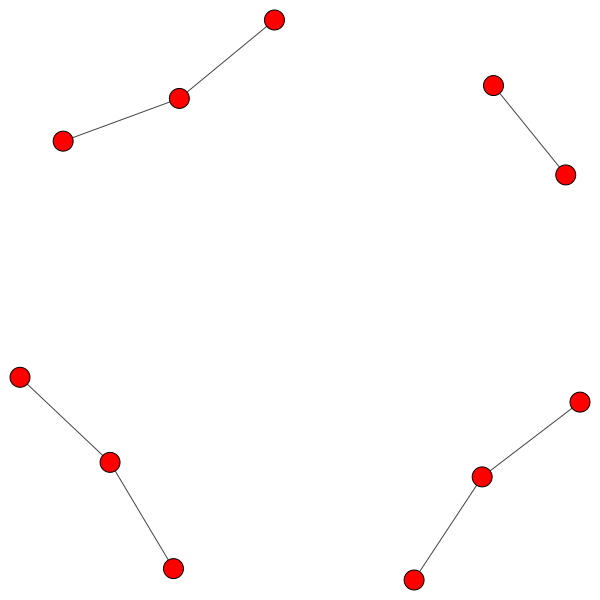

In [368]:
#visualização

g = Graph()
n_vertices = len(alunos)
g.add_vertices(n_vertices)
edges = []

for grupo in solucao:
    for aresta in grupo.arestas:
        edges.append((aresta.aluno1.codigo_aluno-1, aresta.aluno2.codigo_aluno-1))

g.add_edges(edges)        
plot(g)